Problem 1
======================

In [2]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt

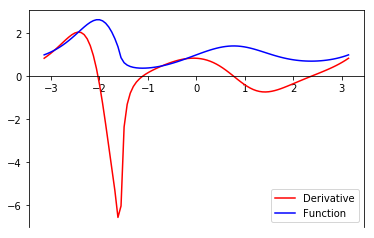

In [3]:
def f(x):
    return (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))

x = sy.symbols('x')

def fprime(x):
    return sy.diff(f(x), x)

derivative = sy.lambdify(x, fprime(x), "numpy")
function = sy.lambdify(x, f(x), "numpy")

points = np.linspace( -np.pi, np.pi, 100)

dfpoints = derivative(points)
fpoints = function(points)

plt.plot(points, dfpoints, 'r', label = 'Derivative')
plt.plot(points, fpoints, 'b', label = 'Function')
plt.legend(loc = 'lower right')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.show()

Problem 2
======================

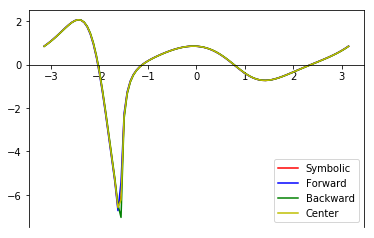

In [36]:
h = sy.symbols('h')

def f(x):
    return (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    
def forward(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points + h)
    fpoints2 = function(points)
    derive = (fpoints1 - fpoints2) / h
    
    return derive

def backward(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points - h)
    fpoints2 = function(points)
    derive = (fpoints2 - fpoints1) / h
    
    return derive

def center(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points + h)
    fpoints2 = function(points - h)
    derive = (fpoints1 - fpoints2) / (2 * h)
    
    return derive

points = np.linspace( -np.pi, np.pi, 100)

derivef = forward(f, points, 0.01)
deriveb = backward(f, points, 0.01)
derivec = center(f, points, 0.01)

plt.plot(points, dfpoints, 'r', label = 'Symbolic')
plt.plot(points, derivef, 'b', label = 'Forward')
plt.plot(points, deriveb, 'g', label = 'Backward')
plt.plot(points, derivec, 'y', label = 'Center')
plt.legend(loc = 'lower right')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.show()

Problem 3
======================

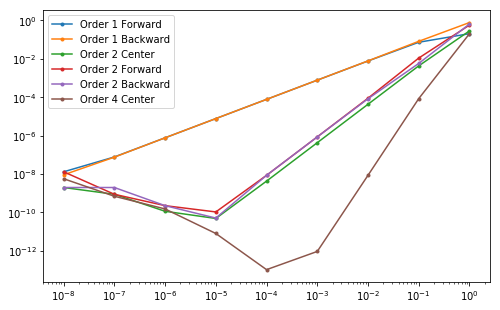

In [115]:
import pylab

def f(x):
    return (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))

def forward2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints2 = function(points + 2 * h)
    fpoints1 = function(points + h)
    fpoints0 = function(points)
    derive = ( (-3) * fpoints0 + 4 * fpoints1 - fpoints2) / (2 * h)
    
    return derive

def backward2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints2 = function(points - 2 * h)
    fpoints1 = function(points - h)
    fpoints0 = function(points)
    derive = ( (3) * fpoints0 - 4 * fpoints1 + fpoints2) / (2 * h)
    
    return derive

def center4(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints3 = function(points - 2 * h)
    fpoints2 = function(points + 2 * h)
    fpoints1 = function(points - h)
    fpoints0 = function(points + h)
    derive = (fpoints3 - 8 * fpoints1 + 8 * fpoints0 - fpoints2) / (12 * h)
    
    return derive

def prob3(x0):
    
    h = np.logspace(-8, 0, 9)
    derivative = sy.lambdify(x, fprime(x), "numpy")
    derivetrue = derivative(x0)
    derivef1e = abs (forward(f, x0, h) - derivetrue)
    deriveb1e = abs (backward(f, x0, h) - derivetrue)
    derivec2e = abs (center(f, x0, h) - derivetrue)
    derivef2e = abs (forward2(f, x0, h) - derivetrue)
    deriveb2e = abs (backward2(f, x0, h) - derivetrue)
    derivec4e = abs (center4(f, x0, h) - derivetrue)
    
    

    pylab.rcParams['figure.figsize'] = (8, 5)
    
    plt.plot(h, derivef1e,'.-', label = 'Order 1 Forward')
    plt.plot(h, deriveb1e,'.-', label = 'Order 1 Backward')
    plt.plot(h, derivec2e,'.-', label = 'Order 2 Center')
    plt.plot(h, derivef2e,'.-', label = 'Order 2 Forward')
    plt.plot(h, deriveb2e,'.-', label = 'Order 2 Backward')
    plt.plot(h, derivec4e,'.-', label = 'Order 4 Center')
    plt.loglog()
    plt.legend(loc = 'upper left')
    plt.show()
    return

prob3(1)

Problem 4
======================

In [149]:
#Trying out lamdify with two variables... don't think it works so I used lambda instead.
#Check out the next box instead. 

data = np.load ("/Users/bryanchia/Desktop/BootCamp2017/ProbSets/Comp/Wk4_DifIntOpt/plane.npy")
time = data[:, 0]
alpha = data[:, 1]
beta = data[:, 2]

alpha = np.deg2rad(alpha)
beta = np.deg2rad(beta)

alpha = sy.symbols('alpha')
beta = sy.symbols('beta')

def xfunc(alpha, beta):
    return (500 * sy.tan(beta)) / (sy.tan(beta) - sy.tan(alpha))

xc = sy.lambdify((alpha, beta), xfunc(alpha, beta), "numpy")

xcoord = xc(alpha, beta)

AttributeError: 'Symbol' object has no attribute 'tan'

In [7]:
data = np.load ("/Users/bryanchia/Desktop/BootCamp2017/ProbSets/Comp/Wk4_DifIntOpt/plane.npy")
time = data[:, 0]
alpha = data[:, 1]
beta = data[:, 2]

alpha = np.deg2rad(alpha)
beta = np.deg2rad(beta)

def xfunc(alpha, beta):
    return (500 * np.tan(beta)) / (np.tan(beta) - np.tan(alpha))

def yfunc(alpha, beta):
    return (500 * np.tan(alpha) * np.tan(beta)) / (np.tan(beta) - np.tan(alpha))

xt = lambda alpha, beta: xfunc(alpha, beta)
yt = lambda alpha, beta: yfunc(alpha, beta)

xt = xt(alpha, beta)
yt = yt(alpha, beta)

h = 1

#Forward 
def forquo(t, xt, yt, h):
    xtp = (xt[t+h] - xt[t]) / h 
    ytp = (yt[t+h] - yt[t]) / h 
    return xtp, ytp

#Centered
def cenquo(t, xt, yt, h):
    xtp = (xt[t+h] - xt[t-h]) / (2 * h) 
    ytp = (yt[t+h] - yt[t-h]) / (2 * h) 
    return xtp, ytp

#Backward
def backquo(t, xt, yt, h):
    xtp = (xt[t] - xt[t-h]) / h 
    ytp = (yt[t] - yt[t-h]) / h    
    return xtp, ytp

xtp = np.empty_like(xt)
ytp = np.empty_like(yt)
speed = np.empty_like(xt)

xtp[0], ytp[0] = forquo(0, xt, yt, h)
xtp[7], ytp[7] = backquo(0, xt, yt, h)

for i in range (1, 6):
    xtp[i], ytp[i] = backquo(i, xt, yt, h)

#Calculate speeds
for j in range (0, len(xt)):
    speed[j] = np.sqrt(xtp[j] ** 2 + ytp[j] ** 2)
    
print(speed)

[  46.42420062   46.42420062   47.58095229   50.41813164   49.78306435
   46.79843577    0.8224685   348.8421277 ]


Problem 5
======================

In [57]:
def f1(x0):
    x, y = x0
    #print(x)
    #print(y)
    f1 = np.empty((2))
    f1[0] = x ** 2
    f1[1] = x ** 3 - y
    return f1

def jacobian(f, x0, h):
    
    m = len(f(x0))
    n = len(x0)
    jacobian = np.empty((m,n))
    
    for i in range (0, n):
        ei = np.zeros((n, 1))
        ei[i] = 1
        jacobian[:,i] = (f(x0 + h * ei ) - f(x0 - h * ei )) / (2 * h)
        
    return jacobian

x0 = np.array((1, 1)).reshape(2,1)
h = 0.1
jacobian = jacobian(f1, x0, h)
print(jacobian)

[[ 2.    0.  ]
 [ 3.01 -1.  ]]


Problem 6
======================

In [26]:
from autograd import grad
import autograd.numpy as anp
import quantecon as qe
from autograd import elementwise_grad

In [21]:
#Sympy

print("Sympy Time: ")
qe.util.tic()
def f6(x):
    return sy.ln(sy.sin(sy.sqrt(x)))

x = sy.symbols('x')

def f6prime(x):
    return sy.diff(f6(x), x)

derivative6 = sy.lambdify(x, f6prime(x), "numpy")
df6 = derivative6(np.pi/4)
qe.util.toc()
print("Sympy Derivative: ", df6)

#Second Order

def center(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points + h)
    fpoints2 = function(points - h)
    derive = (fpoints1 - fpoints2) / (2 * h)
    
    return derive

print("Second Order Centered Derivative Time: ")
qe.util.tic()
derivec6 = center(f6, np.pi/4 , 0.01)
qe.util.toc()
print("Second Order Centered Derivative: ", derivec6)
print("Second Order Centered Derivative Error: ", abs(derivec6 - df6))

#Autograd


print("Autograd Time: ")
qe.util.tic()
g6 = lambda x: anp.log(anp.sin(anp.sqrt(x)))
grad_g = grad(g6)
adf = grad_g(np.pi/4)
qe.util.toc()
print("Autograd Derivative: ", adf)
print("Autograd Error: ", abs(df6 - adf))


Sympy Time: 
TOC: Elapsed: 0.006509065628051758 seconds.
Sympy Derivative:  0.460518022294
Second Order Centered Derivative Time: 
TOC: Elapsed: 0.004295825958251953 seconds.
Second Order Centered Derivative:  0.460552382176
Second Order Centered Derivative Error:  3.43598818972e-05
Autograd Time: 
TOC: Elapsed: 0.0005292892456054688 seconds.
Autograd Derivative:  0.460518022294
Autograd Error:  0.0


Problem 7
======================

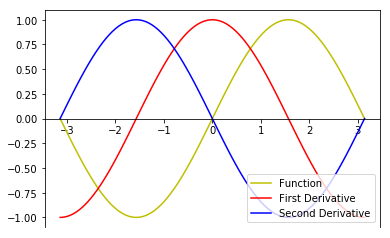

In [25]:
# Define the Taylor series.

def taylor_exp(x, tol=.0001):
    result = 0
    cur_term = x
    i = 0
    while anp.abs(cur_term) >= tol:
        cur_term = (x**((2 * i) + 1) * (-1) ** i ) / np.math.factorial((2 * i) + 1)
        result += cur_term
        i += 1
        
    return result

# Compute the gradients
d_taylor_exp = grad(taylor_exp)
d_taylor_exp2 = grad(d_taylor_exp)

# Note that differentiation in autograd only works with float values.

points = np.linspace(-np.pi, np.pi, 100)

zero = np.sin(points)
first = np.empty_like(points)
second = np.empty_like(points)
i = 0

for x in points:
    
    first[i] = d_taylor_exp(x)
    second[i] = d_taylor_exp2(x)
    i += 1

plt.plot(points, zero, 'y', label = 'Function')
plt.plot(points, first, 'r', label = 'First Derivative')
plt.plot(points, second, 'b', label = 'Second Derivative')
plt.legend(loc = 'lower right')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.show()

Problem 8
======================

In [54]:
#Sympy

x = sy.symbols('x')
y = sy.symbols('y')

X = sy.Matrix([sy.exp(x) * sy.sin(y) + y ** 3, 3 * y - sy.cos(x)])
Y = sy.Matrix([x, y])

sympjacobian = X.jacobian(Y)

df1x = sy.lambdify((x,y), sympjacobian[0,0], "numpy")
df2x = sy.lambdify((x,y), sympjacobian[1,0], "numpy")
df1y = sy.lambdify((x,y), sympjacobian[0,1], "numpy")
df2y = sy.lambdify((x,y), sympjacobian[1,1], "numpy")

print("Sympy Time: ")
qe.util.tic()
df1x = df1x(1,1)
df1y = df1y(1,1)
df2x = df2x(1,1)
df2y = df2y(1,1)
sympjacobian_v = np.array(([df1x, df1y],[df2x, df2y]))
qe.util.toc()
print("Sympy Jacobian: ", sympjacobian_v )
print(sympjacobian_v)

#Second Order

def f8(x0):
    x, y = x0
    f8 = np.empty((2))
    f8[0] = np.exp(x) * np.sin(y) + y ** 3 
    f8[1] = 3 * y - np.cos(x)
    return f8

def jacobians(f, x0, h):
    
    m = len(f(x0))
    n = len(x0)
    jacobian = np.empty((m,n))
    
    for i in range (0, n):
        ei = np.zeros((n, 1))
        ei[i] = 1
        jacobian[:,i] = (f(x0 + h * ei ) - f(x0 - h * ei )) / (2 * h)
        
    return jacobian

x0 = np.array((1, 1)).reshape(2,1)
h = 0.1
print("Second Order Centered Derivative Time: ")
qe.util.tic()
jacobians = jacobians(f8, x0, h)
qe.util.toc()
print("Second Order Centered Derivative Jacobian: ", jacobians)

#Autograd

from autograd import jacobian

f8 = lambda x: anp.array([anp.exp(x[0]) * anp.sin(x[1]) + x[1] ** 3, 3 * x[1] - anp.cos(x[0])])
print("Autograd Time: ")
qe.util.tic()
jacobian_f = jacobian(f8)
jacobiana = jacobian_f(anp.array([1.,1.]))
qe.util.toc()
print("Autograd Jacobian: ", jacobiana)

Sympy Time: 
TOC: Elapsed: 0.0002751350402832031 seconds.
Sympy Jacobian:  [[ 2.28735529  4.46869394]
 [ 0.84147098  3.        ]]
[[ 2.28735529  4.46869394]
 [ 0.84147098  3.        ]]
Second Order Centered Derivative Time: 
TOC: Elapsed: 0.0003230571746826172 seconds.
Second Order Centered Derivative Jacobian:  [[ 2.29116945  4.47624734]
 [ 0.84006923  3.        ]]
Autograd Time: 
TOC: Elapsed: 0.0023229122161865234 seconds.
Autograd Jacobian:  [[ 2.28735529  4.46869394]
 [ 0.84147098  3.        ]]
